# 这里多了scipy, panda两个包，前者涉及到很多数学计算，后者则是数据分析有利的工具

In [22]:
import numpy as np
import pandas as pd
from scipy import stats
import math

# 利用pandas读取csv格式的数据
data = pd.read_csv('./data/test.csv')
# info则是数据的一些基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
Temperature    130 non-null float64
Gender         130 non-null int64
HeartRate      130 non-null int64
dtypes: float64(1), int64(2)
memory usage: 3.1 KB


In [23]:
data

,Temperature,Gender,HeartRate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73
5,97.1,1,75
6,97.1,1,82
7,97.2,1,64
8,97.3,1,69
9,97.4,1,70


In [24]:
#describe函数，快速查看数据分布， 一些统计特征，比如均值，标准差，分位点等等
data.describe()

,Temperature,Gender,HeartRate
count,130.000000,130.000000,130.000000
mean,98.249231,1.500000,73.761538
std,0.733183,0.501934,7.062077
min,96.300000,1.000000,57.000000
25%,97.800000,1.000000,69.000000
50%,98.300000,1.500000,74.000000
75%,98.700000,2.000000,79.000000
max,100.800000,2.000000,89.000000


问题一：人体体温的总体均值是否为98.6华氏度？


答：

原假设H0：人体体温的总体均值等于98.6华氏度

备选假设H1：人体体温的总体均值不等于98.6华氏度

In [36]:
def get_result(data,z,u):
#data:数据, z：置信水平对应的z值, u：总体均值
    sample_num = len(data)
    sample_mean = data.mean()
    #计算样本标准差时注意一下，pandas的std（）默认的是样本标准差；
    #numpy的std（）默认的是总体标准差，若要求样本标准差，需设置ddof =1
    sample_std = data.std()
    #这里使用z统计量
    sample_z = np.sqrt(sample_num)*(sample_mean-u)/sample_std
    #当|sample_z|>z,落在拒绝区域，拒绝原假设
    if (abs(sample_z) < z):
        print('不能拒绝原假设')
    else:
        print('拒绝原假设')



In [38]:
get_result(data['Temperature'],1.96,98.6)

拒绝原假设


问题：体温与心率间的相关性（强？弱？中等？)


答：数值型的数据一般使用皮尔逊相关系数来衡量其线性相关性。

原假设H0：人体体温与心率不相关，r=0

备选假设H1：人体体温与心率相关，r不等于0

In [30]:
def get_result_two(data,z):
#data:数据,z：置信水平对应的z值

    data_f = data[data.Gender == 2]['Temperature']  #Gender=2，女
    data_m = data[data.Gender == 1]['Temperature']  #Gender=1，男
    #计算个数，均值，标准差
    sample_num_f = len(data_f)
    sample_mean_f = data_f.mean()
    sample_std_f = data_f.std()
    sample_num_m = len(data_m)
    sample_mean_m = data_m.mean()
    sample_std_m = data_m.std()
    sample_z = (sample_mean_f-sample_mean_m)/np.sqrt(sample_std_f**2/sample_num_f+sample_std_m**2/sample_num_m)
    if (abs(sample_z)<z):
        print('不能拒绝原假设')
    else:
        print('拒绝原假设')



In [31]:
get_result_two(data,1.96)

拒绝原假设


# scipy Stats部分函数使用

检验数据是否服从正太分布
例如人体的体温是否符合正太分布

In [45]:
print("shapiro_test: ", stats.shapiro(data['Temperature']))

shapiro_test:  (0.9865770936012268, 0.233174666762352)


结果：p value > 0.05, 服从正太分布
这里用seaborn（也是一个画图包，除了前面提到的matplotlib，它也是常用的，画图比较美观）可视化一下，看起来比较符合

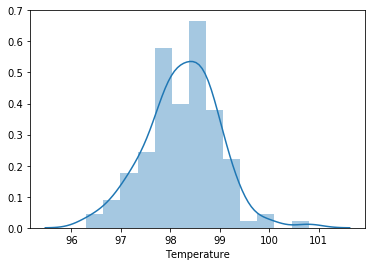

In [47]:
import seaborn as sns
%matplotlib inline
sns.distplot(data['Temperature'])

In [51]:
sample_mean = data['Temperature'].mean()
sample_std = data['Temperature'].std()
sample_min = sample_mean-1.96*sample_std
sample_max = sample_mean+1.96*sample_std
print("当置信水平为95%时，人体体温样本的置信区间为",sample_min,sample_max)

当置信水平为95%时，人体体温样本的置信区间为 96.81219177947445 99.68626975898711


In [52]:
sample_min = sample_mean-2.58*sample_std
sample_max = sample_mean+2.58*sample_std
print("当置信水平为99%时，人体体温样本的置信区间为",sample_min,sample_max)

当置信水平为99%时，人体体温样本的置信区间为 96.3576182214903 100.14084331697126


# 使用皮尔逊相关系数衡量线性相关性（注意：非线性相关难以体现出来）
皮尔逊相关系数在 [-1, 1]范围内，越接近-1代表越呈现线性负相关，越接近0代表越线性无关，越接近1代表越呈现线性正相关

In [53]:
corr_v,corr_p = stats.pearsonr(data['Temperature'],data['HeartRate'])

In [54]:
print('体温与心率的皮尔逊相关系数为{}，p值为{}'.format(corr_v,corr_p))

体温与心率的皮尔逊相关系数为0.25365640272076423，p值为0.003591489250708233


一般我们认为皮尔逊相关系数小于0.3时为弱相关性，又因为p值小于0.05，即原假设体温与心率不相关的发生概率很低，因此我们可以认为体温与心率的相关性是显著的

另外一个例子

In [64]:
import numpy as np
from pandas import DataFrame
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

#这个包自带的一个数据集，可忽略
from sklearn.datasets import load_iris
 
def person_select(X, y):
    #计算每一列特征与y的相关系数
    res = np.array([pearsonr(X[:, i], y) for i in range(X.shape[1])])
    return res[:, 0], res[:, 1]
 

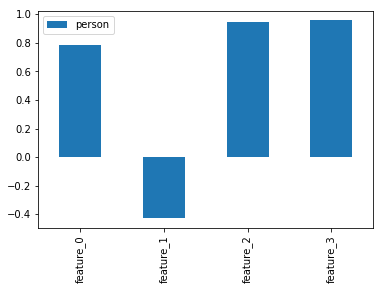

In [65]:
iris = load_iris()
 
person_val, _ = person_select(iris.data, iris.target)
 
#这里为了画图，可忽略
df = DataFrame(np.hstack(person_val.reshape(-1, 1)),
                   index=['feature_{}'.format(i) for i in range(iris.data.shape[1])],
                   columns=pd.Index(['person']))
df.plot(kind='bar')
plt.show()

In [70]:
#一共有150条数据，每条数据4维特征
iris.data.shape

(150, 4)

In [72]:
#三个类，0，1，2
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])